La mia domanda è semplice. Una resnet riesce a riconoscere un pallore da rugby rispetto ad un uovo? Banalissimo problema

In [0]:
# Importo le librerie
from fastai.vision import *

In [0]:
path = Path('data')

In [0]:
folder = 'eggs'
file = 'eggs.csv'

In [0]:
folder = 'rugby'
file = 'rugby.csv'

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['eggs', 'rugby']

In [0]:
file = path/'eggs.csv'
dest = path/'eggs'
download_images(path/file, dest, max_pics=200)

In [0]:
file = 'rugby/rugby.csv'
dest = path/'rugby'
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

eggs


rugby


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=64).normalize(imagenet_stats)

In [0]:
data.classes

['eggs', 'rugby']

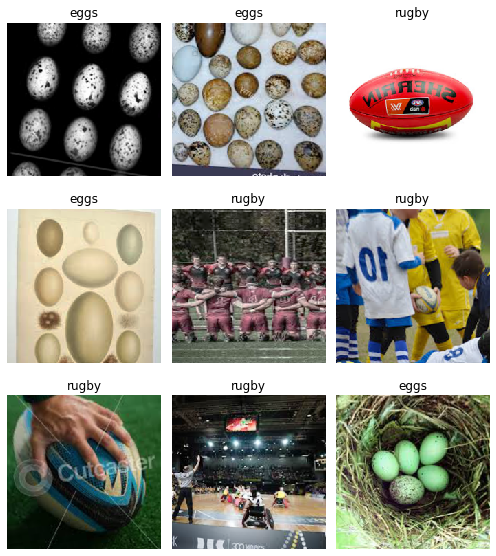

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['eggs', 'rugby'], 2, 128, 32)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.885440,0.379299,0.812500,00:02
1,0.783560,0.258630,0.937500,00:02
2,0.555103,0.276984,0.937500,00:02
3,0.412925,0.234685,0.937500,00:02
4,0.326225,0.176170,0.937500,00:02
5,0.269079,0.148258,0.937500,00:02
6,0.228514,0.125966,0.937500,00:02
7,0.195979,0.106233,0.937500,00:02
8,0.170630,0.097022,0.937500,00:02
9,0.150994,0.088046,0.937500,00:02


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

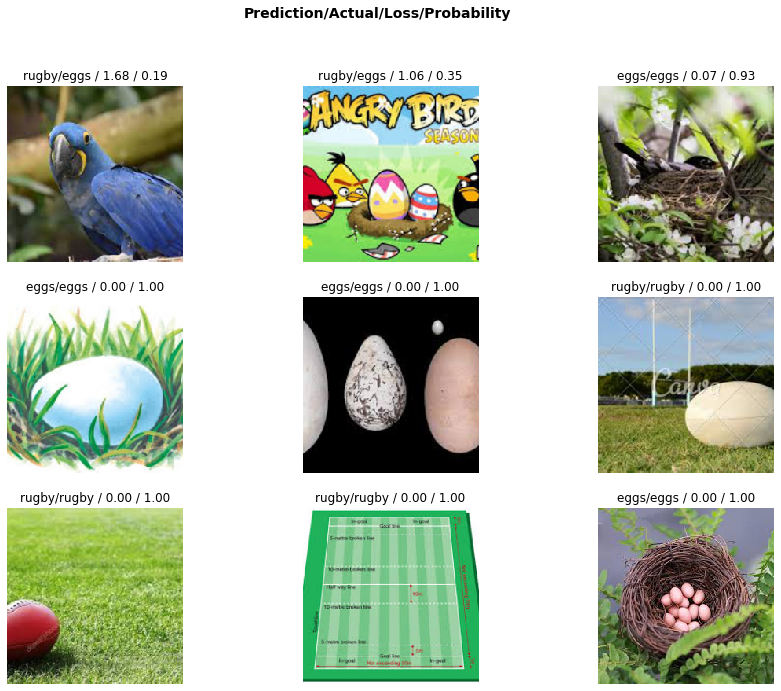

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

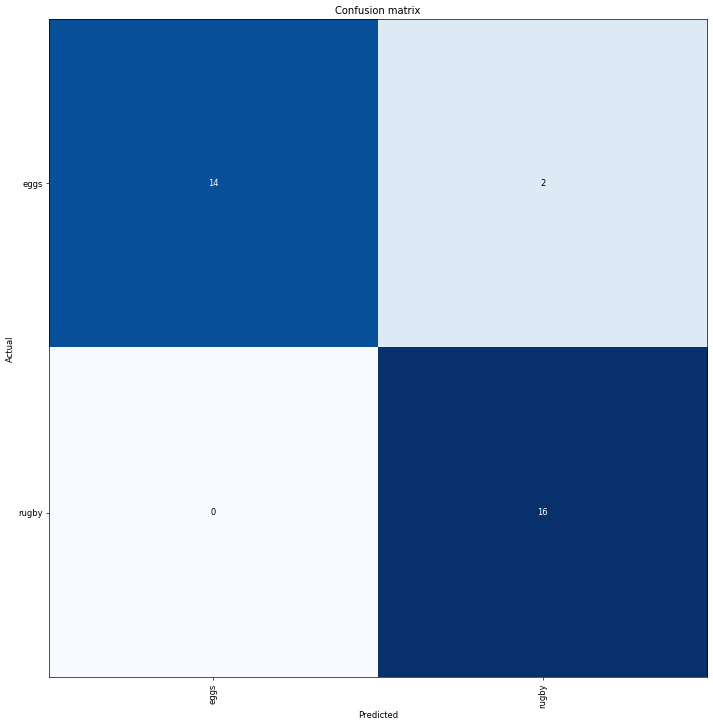

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)